<a href="https://colab.research.google.com/github/agusdwiandika07/Pertemuan4dataset/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d terenceshin/covid19s-impact-on-airport-traffic

  0% 0.00/125k [00:00<?, ?B/s]
100% 125k/125k [00:00<00:00, 19.9MB/s]


In [ ]:
!ls

covid19s-impact-on-airport-traffic.zip	kaggle.json


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  covid19s-impact-on-airport-traffic.zip
  inflating: covid_impact_on_airport_traffic.csv  


In [ ]:
#Import related libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
df = pd.read_csv(r'covid_impact_on_airport_traffic.csv')

In [ ]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [ ]:
# Check the null values
df.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [ ]:
df['Country'].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

Text(0, 0.5, 'Percent of baseline')

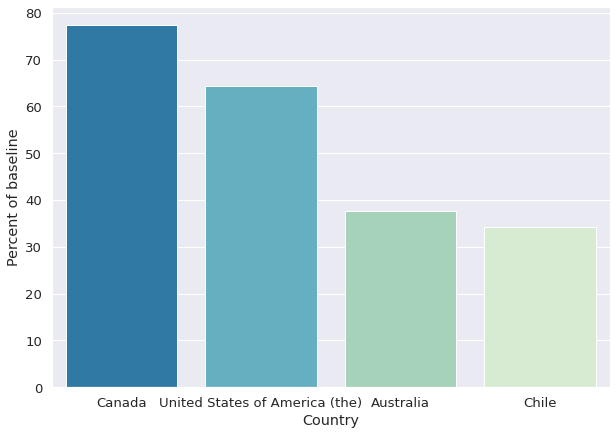

In [ ]:
df1 = df.groupby("Country")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,7])
sns.barplot(data = df1, x=  'Country', y = 'PercentOfBaseline',palette = 'GnBu_r')
plt.ylabel('Percent of baseline')

Text(0.5, 0, 'Percent of baseline')

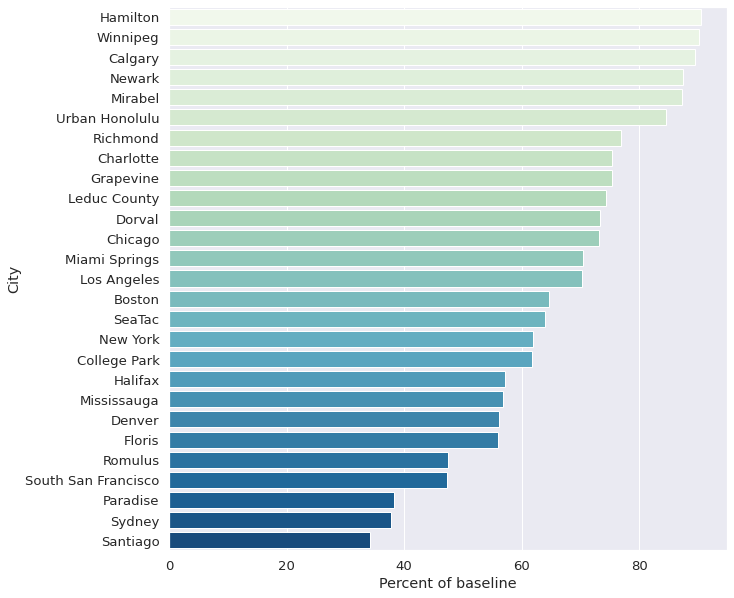

In [ ]:
df1 = df.groupby("City")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df1, x = 'PercentOfBaseline', y ='City',palette = 'GnBu')
plt.xlabel("Percent of baseline")

Text(0, 0.5, 'Airport name')

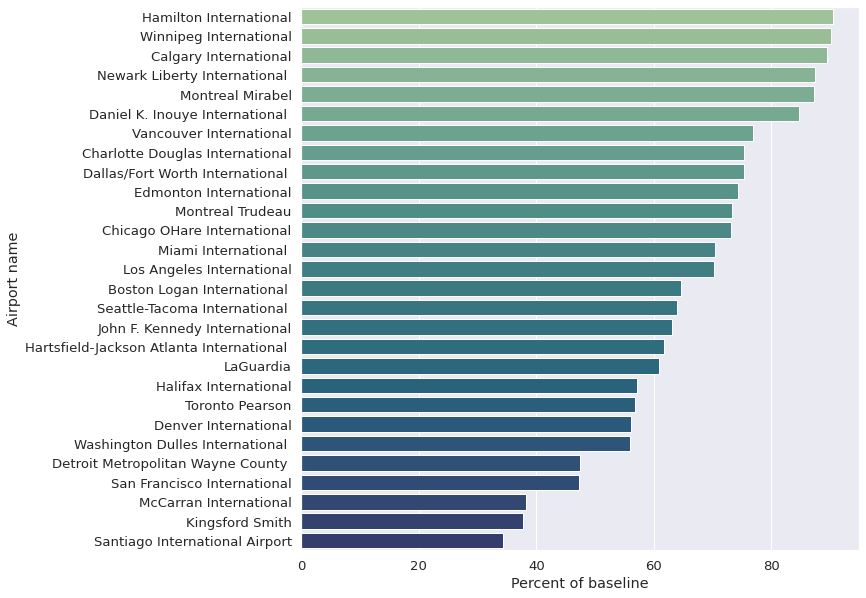

In [ ]:
df1 = df.groupby("AirportName")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df1, x = 'PercentOfBaseline', y = 'AirportName',palette = 'crest')
plt.xlabel('Percent of baseline')
plt.ylabel("Airport name")

In [ ]:
df["lon"] = df.Centroid.apply(lambda x: x.split(" ")[0].replace("POINT("," "))
df["lat"] = df.Centroid.apply(lambda x: x.split(" ")[1].replace(")"," "))

In [ ]:
# Map
df1 = df.groupby(["Country","City",'lat','lon'])['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
fig = px.scatter_geo(df1,
                     lat='lat',
                     lon='lon',
                     hover_name="Country",
                     color = 'Country',
                     hover_data = ['PercentOfBaseline',"City"],
                     labels = {"PercentOfBaseline":"Percent of Baseline"}
                     
                    )

fig.update_geos(showocean = True,
                oceancolor = 'LightCyan',
                lakecolor = 'LightSteelBlue',
                showlakes = True,
               
               )
fig.show()